
# Project: Investigate a Dataset (TMDb Movies Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

 ### Overview 
 
 > For my Data Analysis Project i'm using first dataset in list that is TMDb Movies dataset. I choose this data because i'm quite interesting in Movies. So, it is something relevant to that and i can analyze it with interest also.
 
 > This **TMDb Dataset** Contain data of **10867 movies initially**  and consits all information of those movies like Cast, Ratings, revenues Budget etc. 
 
 #### Questions that can be analyzed from the data 
 
**1** Which Month has Released Highest Number Of Movies In All Of The Years?

**2** which Movies are with the most and least earned revenu.?

**3** Which Movies had most and least profit?

**4** Which Movies with largest and lowest budgets?

**5** which are the most succesfull genres?

**6** How did the amount of produced films changed over time?

**7** Which is the most frequent Cast that makes movies profitable? 

**8** What is the average revenue earned by the profitable movies?

**9** What is the Average runtime of the profitable movies?

**10**What is the Average budget of the profitable movies?

In [2]:
# In this section i important packages for analysis of Data like Pandas to load dataframe and clean the dataframe 
# And Analyze differet things in Data frame ,
#import matplotlib to plot graphs, charts, sctatter plots ,
# import numpy for different diffeent calculations and provide us fast mathematical calculations 
#import seaborn for make our graph more descriptive and easy to understand and analyze 

import pandas as pd 
import numpy as np
import seaborn as sns
import csv
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline




<a id='wrangling'></a>
## Data Wrangling

> In this Section of Data Wrangling , we load our Data Clean Our Data and Remove the unused column which are not useful for our Analysis.

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data

# Loading Data with the help of Pandas 

df_tmdb = pd.read_csv('tmdb-movies.csv')


# Printing First few rows with the help of head() 

df_tmdb.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# intial no. of columns and rows  we can easily calculate the shape of dataframe with the code below in this cell 

df_tmdb.shape

(10866, 21)



### Data Cleaning (Replace this with more specific notes!)

###  observation of Data 

   So after viewing the data in tmdb.csv lets understand some observation.

**1** The last two columns naming with budget_adj and revenue_adj  have scientific numbers.

**2** There are some unused column in Data set also which will not help us to analyze the data.

**3** Cast column and Genres column contain multiple value which are seperated by '|'(pipe).

**4** date is not in date time format 

### Cleaning Data Process 

**1** Clean the Unused column which are not heplfull in analyzing Data like ['Production company', 'overview', 'tagline', 'keyword', 'homepage']

**2** Remove the duplicates value in rows.

**3** Some values in data have zero budget and zero revenue so we can discard such enteries.

**4** Dealing with Zero and replace it with NAN.

**5** Change the release date column to date time format. 

**6** change Scientific numbers from the the last to column budget_adj and revenue_adj and make it numeric. 


In [5]:
# Remove Unused Column from the database.

 # Creating list of column that have to be deleted.
    
del_column  = ['production_companies', 'overview', 'tagline', 'keywords', 'homepage']

# Delete these column 

df_tmdb= df_tmdb.drop(del_column,1)


In [6]:
# Check wheater these four columns are deleted or not 

df_tmdb.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [7]:
# Just Check in another way 

df_tmdb.shape

(10866, 16)

**Above cell** clearly Showed that Unused columns is removed from the Database.
Because intially it was(10866,21) and now it is (10866,16).




**Now Check the duplicacy in rows and columns**


In [8]:
# Checking duplicates Row 

sum(df_tmdb.duplicated())

1

In [9]:
# So now drop that duplicate row

df_tmdb.drop_duplicates(inplace = True)


In [10]:
# Again Check the sum of duplicate row for confirmation 

sum(df_tmdb.duplicated())


0

##### Dealing with 0 in budget and revenue column 

In [11]:
# creating seperate list

dealing=['budget', 'revenue']

#this line of  will replace all the value from '0' to NAN in the column which is present in list dealing

df_tmdb[dealing] = df_tmdb[dealing].replace(0, np.NAN)

# Now Removing all the row which has NaN value  because if there in no budget and revenue we can discard those rows

df_tmdb.dropna(subset = dealing, inplace = True)

df_tmdb.shape


(3854, 16)

Now we have 3854 rows and 16 columns 

#### Replace zero with NAN in runtime column 

In [12]:
# this line of code eplaace zero with NAN in runtime column 
df_tmdb['runtime'] =df_tmdb['runtime'].replace(0, np.NAN)

#### Change the format of release date time column

In [13]:
# First we see type of release_date column 

df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 16 columns):
id                3854 non-null int64
imdb_id           3854 non-null object
popularity        3854 non-null float64
budget            3854 non-null float64
revenue           3854 non-null float64
original_title    3854 non-null object
cast              3850 non-null object
director          3853 non-null object
runtime           3854 non-null int64
genres            3854 non-null object
release_date      3854 non-null object
vote_count        3854 non-null int64
vote_average      3854 non-null float64
release_year      3854 non-null int64
budget_adj        3854 non-null float64
revenue_adj       3854 non-null float64
dtypes: float64(6), int64(4), object(6)
memory usage: 511.9+ KB


In [14]:
# this line of code change the format of release date column 

df_tmdb.release_date = pd.to_datetime(df_tmdb['release_date'])

In [15]:
# Now again check the data type of release_date column 

df_tmdb.info()

# It is Succesfully Change 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 16 columns):
id                3854 non-null int64
imdb_id           3854 non-null object
popularity        3854 non-null float64
budget            3854 non-null float64
revenue           3854 non-null float64
original_title    3854 non-null object
cast              3850 non-null object
director          3853 non-null object
runtime           3854 non-null int64
genres            3854 non-null object
release_date      3854 non-null datetime64[ns]
vote_count        3854 non-null int64
vote_average      3854 non-null float64
release_year      3854 non-null int64
budget_adj        3854 non-null float64
revenue_adj       3854 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(4), object(5)
memory usage: 511.9+ KB


In [16]:
# list that contain those column which contain scientific values 
change_col = ['budget_adj', 'revenue_adj','revenue','budget']

#I'm changing those values to int for easy calculation 

df_tmdb[change_col]=df_tmdb[change_col].applymap(np.int64)

#Use to see the changes in data 

df_tmdb.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,137999939,1392445892
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,137999939,348161292
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,101199955,271619025
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,183999919,1902723129
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,174799923,1385748801


In [17]:
# Now Again check the Data types of all columns 

df_tmdb.info()

# Fixing of Data types become successfull

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 16 columns):
id                3854 non-null int64
imdb_id           3854 non-null object
popularity        3854 non-null float64
budget            3854 non-null int64
revenue           3854 non-null int64
original_title    3854 non-null object
cast              3850 non-null object
director          3853 non-null object
runtime           3854 non-null int64
genres            3854 non-null object
release_date      3854 non-null datetime64[ns]
vote_count        3854 non-null int64
vote_average      3854 non-null float64
release_year      3854 non-null int64
budget_adj        3854 non-null int64
revenue_adj       3854 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(8), object(5)
memory usage: 511.9+ KB


<a id='eda'></a>
## Exploratory Data Analysis

> **Now** After cleaning the data remove all unused columns ,Fixing all the Data types We are ready to Now Answering all the questionn and ready to analyze the Data.

### Research Question->1   Which Month Released Highest Number Of Movies In All Of The Years?

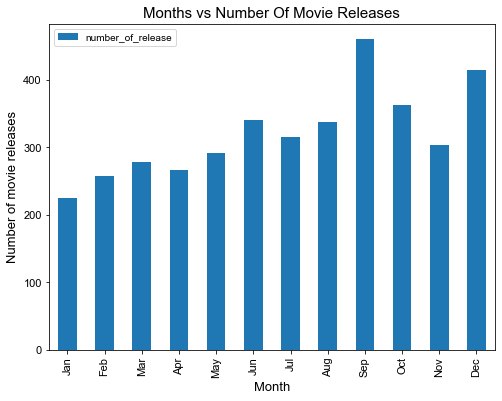

In [18]:

#extract the month number from the release date.

month_release = df_tmdb['release_date'].dt.month

# NOW count the movies in each month using value_counts().

number_of_release = month_release.value_counts().sort_index()
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

number_of_release = pd.DataFrame(number_of_release)

number_of_release['month'] = months

#change the column name of the new dataframe 'number_of_release'
number_of_release.rename(columns = {'release_date':'number_of_release'},inplace=True)

#plot the bar graph using plot.
number_of_release.plot(x='month',kind='bar',fontsize = 11,figsize=(8,6))

#set the labels and titles of the plot. and using of seaborn for graph look more good 

plt.title('Months vs Number Of Movie Releases',fontsize = 15)
plt.xlabel('Month',fontsize = 13)
plt.ylabel('Number of movie releases',fontsize = 13)
sns.set_style("darkgrid")


**So** According to graph September has highest number of releases.

### Research Question -> 2 Which Movies are with the most and least earned revenue.?

In [19]:
import pprint
# now we define a calculate function and use it for different analysis.

def calculate(column):
    #for highest earned profit
    high= df_tmdb[column].idxmax()
    high_details=pd.DataFrame(df_tmdb.loc[high])
    
    #for lowest earned profit
    low= df_tmdb[column].idxmin()
    low_details=pd.DataFrame(df_tmdb.loc[low])
    
    #collectin data in one place
    info=pd.concat([high_details, low_details], axis=1)
    
    return info
# Calling this function to calculate revenue to print the rows which have most and least revenue

calculate('revenue')

,1386,5067
id,19995,13537
imdb_id,tt0499549,tt0323944
popularity,9.43277,0.462609
budget,237000000,6000000
revenue,2781505847,2
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History


> **Row 1386** shows highest Revenue and Movie Name is **Avatar** 

>**Row 5067** shows lowest Revenue and Movie Name is **Shattered Glass**

In [20]:
df_tmdb.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3854.000000,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,39888.185262,1.191554,3.720370e+07,1.076866e+08,109.220291,527.720291,6.168163,2001.261028,4.423999e+07,1.370647e+08
std,67222.527399,1.475162,4.220822e+07,1.765393e+08,19.922820,879.956821,0.794920,11.282575,4.480925e+07,2.161114e+08
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,0.000000e+00,2.000000e+00
25%,6073.500000,0.462368,1.000000e+07,1.360003e+07,95.000000,71.000000,5.700000,1995.000000,1.309053e+07,1.835735e+07
50%,11321.500000,0.797511,2.400000e+07,4.480000e+07,106.000000,204.000000,6.200000,2004.000000,3.001611e+07,6.173068e+07
75%,38573.250000,1.368324,5.000000e+07,1.242125e+08,119.000000,580.000000,6.700000,2010.000000,6.061307e+07,1.632577e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


## Research Question ->3 Which Movies had most and least profit?

In [21]:
# now we insert a new column named as profit_earned in the dataset

#we use insert function with three parameters(column index , column name , value to be inserted)

df_tmdb.insert(5,'profit_earned',df_tmdb['revenue']-df_tmdb['budget'])







In [22]:
# now check our data set with new colum profit_earned
df_tmdb.head()

# Column added sucessfully 

,id,imdb_id,popularity,budget,revenue,profit_earned,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,137999939,1392445892
1,76341,tt1392190,28.419936,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,137999939,348161292
2,262500,tt2908446,13.112507,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,101199955,271619025
3,140607,tt2488496,11.173104,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,183999919,1902723129
4,168259,tt2820852,9.335014,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,174799923,1385748801


In [23]:
# we will call same calculate function to do this analysis also 

# This function will print the rows which has most and least profit

calculate('profit_earned')


,1386,2244
id,19995,46528
imdb_id,tt0499549,tt1032751
popularity,9.43277,0.25054
budget,237000000,425000000
revenue,2781505847,11087569
profit_earned,2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
runtime,162,100


 It clearly shows that movie **Avatar** has earned highest profit.
 
 It clearly shows that movie **The warriors way** has earned least profit as it is in loss(negative value shows the loss)

## Research Question -> 4  Which Movies with largest and lowest budgets?

In [24]:
# we just again call calculate function for this question 

# This function will print the the rows which has least and most budget 

calculate('budget')



,2244,2618
id,46528,39964
imdb_id,tt1032751,tt0120836
popularity,0.25054,0.090186
budget,425000000,1
revenue,11087569,100
profit_earned,-413912431,99
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
runtime,100,95


 It clearly shows that the Movie **The Warriors Way** has highest budget 
 
 It clearly shows that the Movie **Lost & Found** has lowest budget

## Research Question->5 which are the most succesfull genres

In [25]:
#Now we make a function that seperate the columns value which are seperated by |(pipe).

def data(column):
    #this data will take a column, and separate the string by '|'
    
    data = df_tmdb[column].str.cat(sep = '|')
    
    # now we are giving pandas series and storing the values separately
    data = pd.Series(data.split('|'))
    
    #arranging in descending order
    count_genres = data.value_counts(ascending = False)
    
    return count_genres

In [26]:

# Now we make a variable to store the retured value
count_genres = data('genres')
#printing top values
count_genres.head()

Drama        1756
Comedy       1358
Thriller     1204
Action       1085
Adventure     749
dtype: int64

**let's visulasize this Data** 

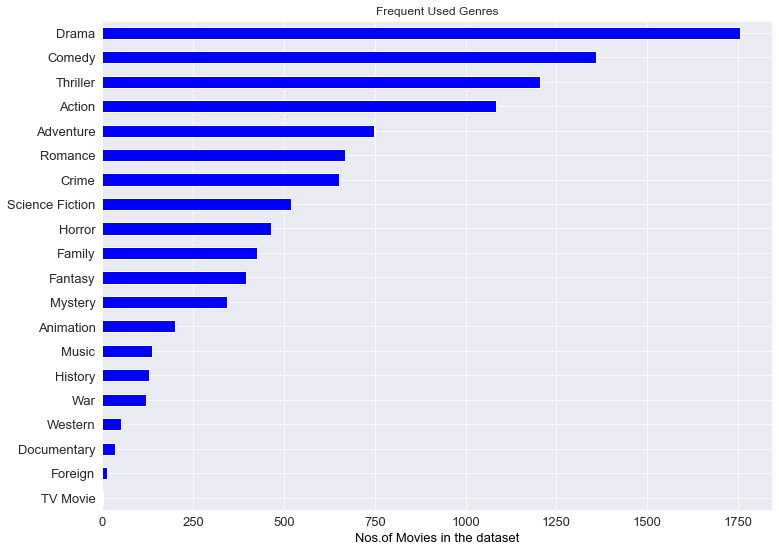

In [27]:
count_genres.sort_values(ascending = True, inplace = True)

#ploting
gn = count_genres.plot.barh(color = 'blue', fontsize = 13)

#title
gn.set(title = 'Frequent Used Genres')

# on x axis
gn.set_xlabel('Nos.of Movies in the dataset', color = 'black', fontsize = '13')

#figure size(width, height)

gn.figure.set_size_inches(12, 9)

#ploting the graph
plt.show()

It clearly shows that **Drama** has most popular genres followed by **Comedy** and **Thriller**

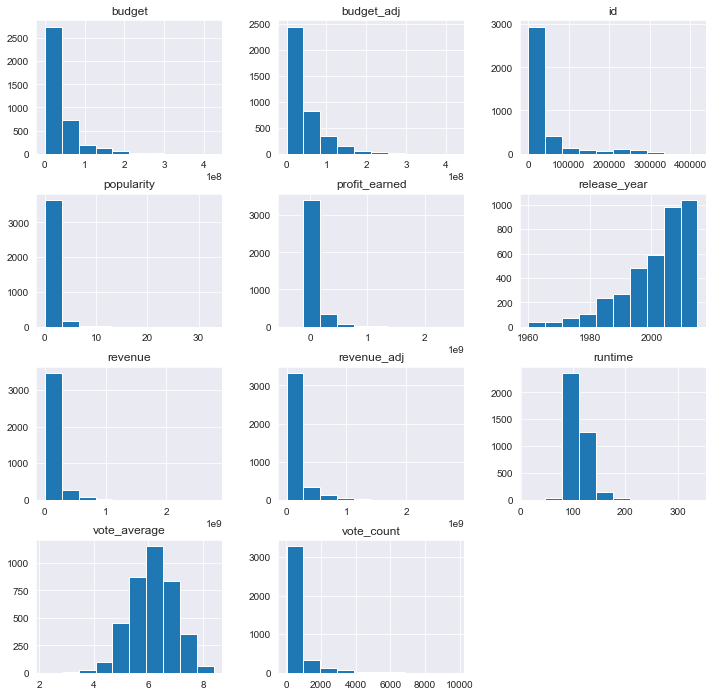

In [28]:
# just draw the histogram of all columns 

df_tmdb.hist(figsize=(12,12));

## Reseach Question->6  How did the amount of produced films changed over time?

In [29]:
years = df_tmdb['release_year'].unique()  #creates an array of years mentioned in release year
movies_count = []  #creates a list of tuples for amount of movies

#for loop to create amount_of_movies, years was previously defined
for year in years:
    d = df_tmdb[df_tmdb['release_year'] == year] #creates df filtered by every year mentioned in years
    e = len(d.index) #determines the number of rows 
    movies_count.append((year, e)) #appends year with respective number of rows
    
#creates df for list of tuples amount_of_movies
df_movie_count = pd.DataFrame(movies_count, columns=['release_year', 'Movie_produced']).sort_values('release_year').reset_index().drop(['index'], axis=1)

In [30]:

df_movie_count

,release_year,Movie_produced
0,1960,5
1,1961,10
2,1962,7
3,1963,6
4,1964,7
5,1965,5
6,1966,5
7,1967,13
8,1968,9
9,1969,4


lets **Visulaise** this data

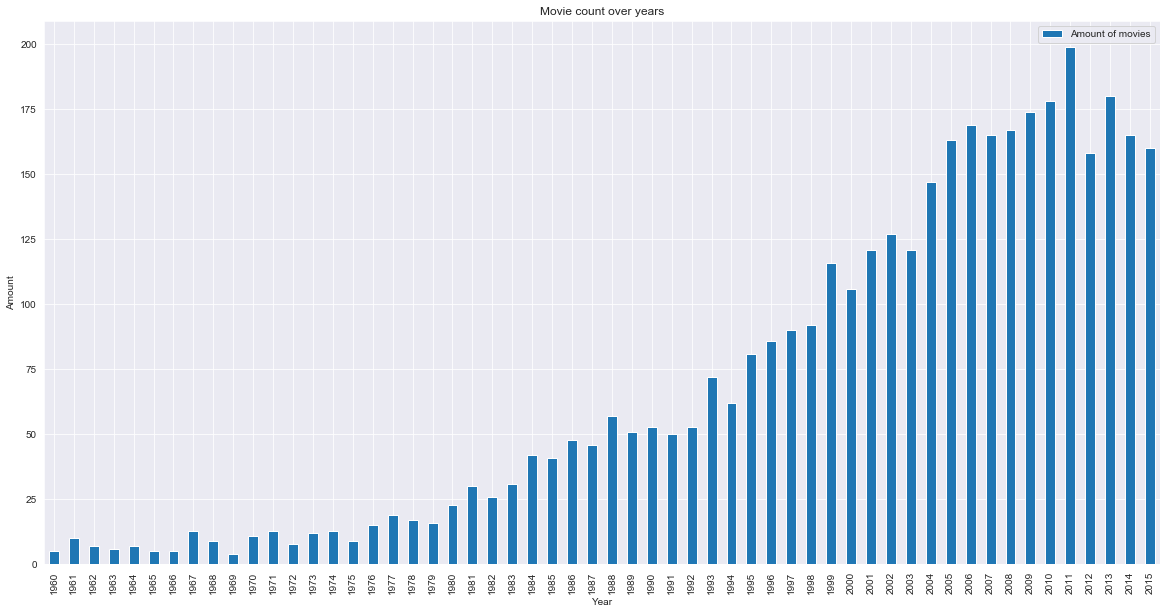

In [31]:
df_movie_count.plot(x='release_year', y='Movie_produced', kind='bar', figsize=(20,10), title="Movie count over years", label="Amount of movies", )
plt.xlabel('Year')
plt.ylabel('Amount');

As we seen through this graph that year **2011** has highest number of movies releases followed by year **2013**

In [32]:
df_tmdb.head()

,id,imdb_id,popularity,budget,revenue,profit_earned,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,137999939,1392445892
1,76341,tt1392190,28.419936,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,137999939,348161292
2,262500,tt2908446,13.112507,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,101199955,271619025
3,140607,tt2488496,11.173104,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,183999919,1902723129
4,168259,tt2820852,9.335014,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,174799923,1385748801


## Research Question -> 7 which is the most frequent Cast that makes movies profitable? 

#### For counting frequent cast which make more profit in movies so we have to create new Data frame that consists a good profitable movies . lets suppose we fix profit amout of 40 million dollar. 

In [34]:

#Selecting the movies having profit $40M or more
profited_movie_data = df_tmdb[df_tmdb['profit_earned'] >= 40000000]

#giving new indexing to the new data
profited_movie_data.index = range(len(profited_movie_data))

# Now we will start from 1 instead of 0
profited_movie_data.index = profited_movie_data.index + 1

#printing the changed dataset
profited_movie_data.head(3)


,id,imdb_id,popularity,budget,revenue,profit_earned,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1,135397,tt0369610,32.985763,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,137999939,1392445892
2,76341,tt1392190,28.419936,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,137999939,348161292
3,262500,tt2908446,13.112507,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,101199955,271619025


**Now** we call same **data** function and make some changes in it.

In [35]:
def data(column):
    #this data will take a column, and separate the string by '|'
    
    data = profited_movie_data[column].str.cat(sep = '|')
    
    # now we are giving pandas series and storing the values separately
    data = pd.Series(data.split('|'))
    
    #arranging in descending order
    count = data.value_counts(ascending = False)
    
    return count

In [36]:
#variable to store the retured value
count_cast = data('cast')
#printing top 5 values
count_cast

Tom Cruise               27
Tom Hanks                26
Brad Pitt                25
Cameron Diaz             22
Robert De Niro           21
Bruce Willis             21
Sylvester Stallone       21
Denzel Washington        20
Jim Carrey               20
Matt Damon               20
Samuel L. Jackson        19
Arnold Schwarzenegger    19
Harrison Ford            19
Adam Sandler             19
Eddie Murphy             19
Nicolas Cage             18
Ben Stiller              18
Robin Williams           18
George Clooney           18
Johnny Depp              18
Julia Roberts            17
Will Smith               17
Ralph Fiennes            16
Owen Wilson              16
John Travolta            16
Leonardo DiCaprio        16
Gary Oldman              16
Anne Hathaway            15
John Goodman             15
Morgan Freeman           15
                         ..
Franco Nero               1
Nicholas D'Agosto         1
Nolan Gould               1
Orto Ignatiussen          1
Jean Seberg         

##### So by using head() be can print some cast name who are frequently casts in profitable movies 

In [37]:
count_cast.head()

Tom Cruise        27
Tom Hanks         26
Brad Pitt         25
Cameron Diaz      22
Robert De Niro    21
dtype: int64

So **Tom Cruise , Tom Hanks, Brad Pitt** are the most frequent Cast who make profitable movies

## Research Question->8 What is the average revenue earned by the profitable movies?

In [38]:
#So, we can easily find the average revenue earned by profitable movie with mean() method.

profited_movie_data['revenue'].mean()

236306323.37374413

## Reserch Question ->9  What is the Average runtime of the profitable movies?

In [39]:
#So, we can easily find the average runtime by profitable movie with mean() method.
profited_movie_data['runtime'].mean()

113.19624916275954

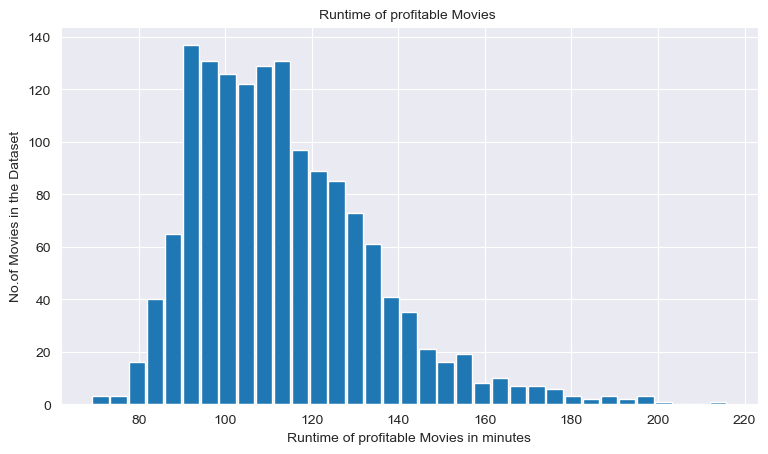

In [40]:
#plotting a histogram of runtime of Profitable movies movies

#giving the figure size(width, height)
plt.figure(figsize=(9,5), dpi = 100)

#On x-axis 
plt.xlabel('Runtime of profitable Movies in minutes', fontsize = 10)
#On y-axis 
plt.ylabel('No.of Movies in the Dataset', fontsize=10)
#Name of the graph
plt.title('Runtime of profitable Movies ', fontsize=10)

#giving a histogram plot
plt.hist(profited_movie_data['runtime'], rwidth = 0.9, bins =35)
#displays the plot
plt.show()

The mostly profitable movie runtime lies between **90-120 minutes** 

**Lets analyze more with the Seaborn**

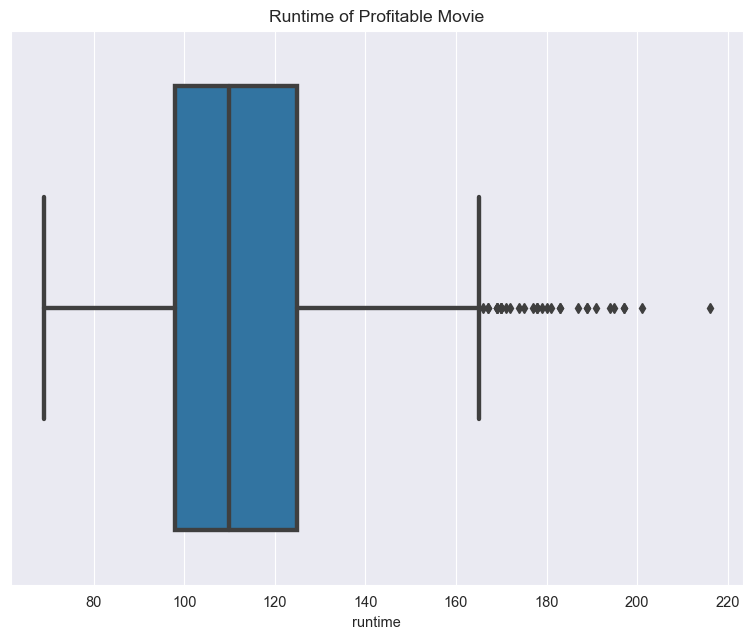

In [54]:
#The plot is box plot of the runtime of the profitable movies

plt.figure(figsize=(9,7), dpi = 105)

#We use seaborn to generate the boxplot

sns.boxplot(profited_movie_data['runtime'],linewidth = 3)
plt.title('Runtime of Profitable Movie')


#diplaying the plot

plt.show()

The Box Plot Clearly Shows that **Mean Run time** of profitable Movie is approx **110-115 minutes**. 

## Reserch Question ->10  What is the Average budget of the profitable movies?

In [42]:
#So, we can easily find the average budget of  profitable movie with mean() method.
profited_movie_data['budget'].mean()

57308877.08305425

<a id='conclusions'></a>
## Conclusions

> After doing all the processes Like  Data cleaning , fixing Data types , Data Analysis, some visualisation 
  
> Now we are able to Conclude and Give our findings.

> This was very amazing Project i learned a lot of important things in data Analysis.

> Basically from this dataset of Movies , We come out with importanct Facts and Figure.

###  Observation for Movie to be in succesfull creteria.

>**1** The Average Budget of Movie should lie between 40-50 million dollar.

>**2** The Average Runtime of Movie should lie between 110 -120 minutes .

>**3** Cast should be 'Tom Cruise ','Tom Hanks', 'Brad Pitt', 'Robert Di Niro', 'Cameron Diaz' for Higher profit.

>**4** Genre must be 'Drama' , 'Comedy' , 'Thriller' , 'Action'.

> IF a movie Contain all this Features and pass all that creteria, it become a hit movie and hence can earn an Avrage revenue of approx 240 Million Dollar and People love that movie. because it consists all the features they want.

### Limitations: 

> As the result is limited and dataset cotain many missing enteries that i removed due to missing values. This Analysis was done considering the profitable movie and i fix some amount below that i didn't consider that movie is profitable. My analysis might not be completly error free but the result from this Analysis can act as a indicator For making profitable Movie.
we are also not sure that our Data is correct. because the revenue,budget column has no currency unit , so i take it as Dollar.
Furthermore the rows which i delete from the dataset will affect the analysis. So You should consider that analysis as indicator for making profitable or Successfull movies.